In [131]:
import numpy as np
import pandas as pd

# **DATA IMPORT & PREPROCESSING**

In [132]:
# Preprocessing for topic modeling result
def tp_preprocessing(tp, type_check):
    tp_df = tp
    cn = tp_df['cmp']
    
    for i, val in enumerate(cn):
        if '(주)' in val:
            tmp = val.replace('(주)','')
            tp_df.loc[i,'cmp'] = tmp
    
    col_list = list(tp_df.columns)
    col_list[0] = 'company_name'
    for i in range(1, len(tp_df.columns)):
        if type_check == 'adv':
            col_list[i] = 'adv_topic ' + str(col_list[i])
        if type_check == 'dadv':
            col_list[i] = 'dadv_topic ' + str(col_list[i])
    tp_df.columns = col_list

    return tp_df

In [133]:
# Preprocessing for financial variable
def fv_preprocessing(fv):
  fv_df = fv
  afv = fv_df['average_salary']
  tfv = fv_df['total_sale']

  for i, val in enumerate(afv):
    if '만원' in val:
      tmp = int(val[:-2].replace(',',''))
      fv_df.loc[i,'average_salary'] = tmp
    if '회사' in val:
      fv_df.loc[i,'average_salary'] = np.NAN
    if '수집' in val:
      fv_df.loc[i,'average_salary'] = np.NAN


  for i, val in enumerate(tfv):
    if '조원' in val:
      tmp = float(val[:-2].replace(',',''))*1000
      fv_df.loc[i,'total_sale'] = tmp
    if '억원' in val:
      tmp = float(val[:-2].replace(',',''))
      fv_df.loc[i,'total_sale'] = tmp
    if '회사' in val:
      fv_df.loc[i,'total_sale'] = np.NAN


  
  return fv_df

In [134]:
# Preprocessing for turn over rate
def tor_preprocessing(tor):
  tor_df = tor
  tor_val = tor_df['turn_over_rate']

  for i, val in enumerate(tor_val):
    if '정보' in val:
      tor_df.loc[i,'turn_over_rate'] = np.NAN
    elif val == '(9999%)' :
      tor_df.loc[i,'turn_over_rate'] = np.NAN
    elif '(' in val:
      tmp = float(val[1:-1].replace('%',''))*0.01
      tor_df.loc[i,'turn_over_rate'] = tmp

  return tor_df

In [135]:
tp_adv = pd.read_csv("input/topic_modeling_result/bank_adv_topic_modeling.csv")
tp_dadv = pd.read_csv("input/topic_modeling_result/bank_dadv_topic_modeling.csv")

fv = pd.read_csv("input/financial_variable/bank_financial_financial_variable.csv")
tor = pd.read_csv("input/turn_over_rate/bank_financial_business_turn_over_rate.csv")

In [136]:
tp_adv = tp_adv.drop(['Unnamed: 0'], axis=1)
tp_adv = tp_preprocessing(tp_adv,'adv')
tp_dadv = tp_dadv.drop(['Unnamed: 0'], axis=1)
tp_dadv = tp_preprocessing(tp_dadv,'dadv')
fv = fv.drop(['Unnamed: 0'], axis=1)
fv = fv_preprocessing(fv)
tor = tor.drop(['Unnamed: 0'], axis=1)
tor = tor_preprocessing(tor)

In [137]:
df = pd.merge(tp_adv, tp_dadv, on = 'company_name', how = 'inner')
df = pd.merge(df, fv, on = 'company_name', how = 'inner')
df = pd.merge(df, tor, on = 'company_name', how = 'inner')
df = df.dropna()
df['average_salary'] = pd.to_numeric(df['average_salary'])
df['total_sale'] = pd.to_numeric(df['total_sale'])

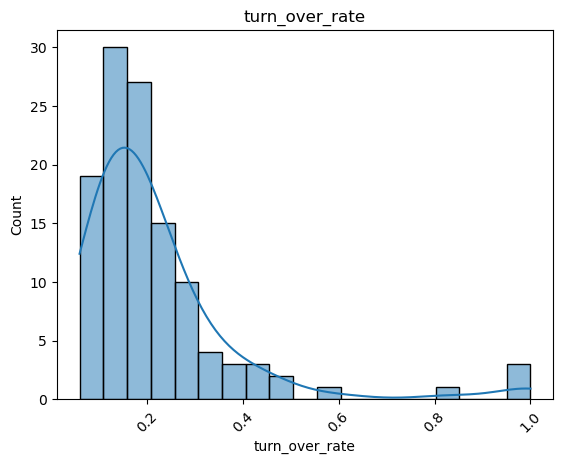

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('turn_over_rate')
plt.xticks(rotation = 45)
sns.histplot(df['turn_over_rate'],kde=True)
plt.show()


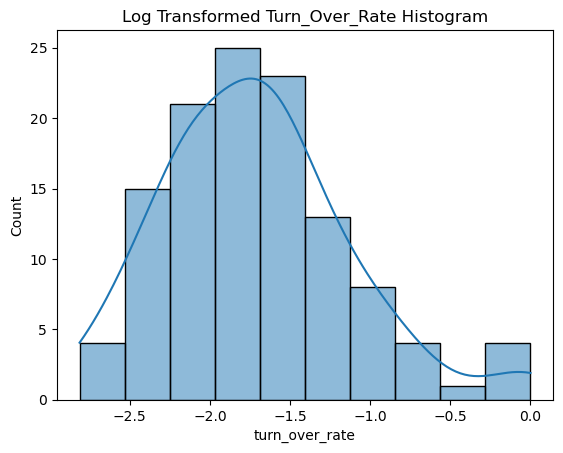

In [139]:
plt.title('Log Transformed Turn_Over_Rate Histogram')
log_tor = np.log(df['turn_over_rate'].astype('float'))
sns.histplot(log_tor,kde=True)
plt.show()

In [140]:
original_tor = df['turn_over_rate']
df['turn_over_rate'] = log_tor = np.log(df['turn_over_rate'].astype('float'))
df

,company_name,adv_topic 0,adv_topic 1,adv_topic 2,adv_topic 3,adv_topic 4,adv_topic 5,dadv_topic 0,dadv_topic 1,dadv_topic 2,dadv_topic 3,dadv_topic 4,average_salary,total_sale,turn_over_rate
0,국민건강보험공단,0.000000,0.999386,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.999572,6441,75400.0,-1.609438
1,근로복지공단,0.000000,0.999270,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.999492,5817,9406.2,-2.040221
3,농협은행,0.000000,0.000000,0.000000,0.260527,0.000000,0.738698,0.181343,0.000000,0.000000,0.000000,0.812849,6182,13100.0,-1.897120
4,현대카드,0.000000,0.433746,0.000000,0.565337,0.000000,0.000000,0.000000,0.999159,0.000000,0.000000,0.000000,8737,2300.0,-1.049822
5,중소기업은행,0.000000,0.010276,0.000000,0.000000,0.000000,0.988675,0.000000,0.012572,0.040652,0.000000,0.946242,10065,14800.0,-1.832581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,바로크레디트대부,0.015249,0.923682,0.015247,0.015275,0.015289,0.015258,0.000000,0.000000,0.970678,0.000000,0.000000,4354,1133.0,-1.514128
139,글로벌금융판매,0.000000,0.000000,0.000000,0.000000,0.990223,0.000000,0.000000,0.000000,0.000000,0.996440,0.000000,3442,4473.3,-0.776529
140,현대하이카손해사정,0.973719,0.000000,0.000000,0.000000,0.000000,0.000000,0.317989,0.000000,0.000000,0.000000,0.664502,6082,1294.9,-2.525729
141,아이비케이캐피탈,0.000000,0.000000,0.000000,0.000000,0.000000,0.992217,0.000000,0.000000,0.000000,0.899822,0.093894,9880,3933.2,-2.813411


# **MACHINE LEARNING MODEL**

**Linear, Ridge, Lasso**

In [141]:
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__, ' RMSE: ', np.round(rmse,3))
    return rmse

In [142]:
def get_rmses(models):
    rmses = []
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [143]:
# Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

y_target = df['turn_over_rate']
x_data = df.drop(['company_name','turn_over_rate'], axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(x_data, y_target, test_size = 0.2, random_state = 7)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train,y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)


LinearRegression  RMSE:  0.643
Ridge  RMSE:  0.648
Lasso  RMSE:  0.644


[0.6428970047035094, 0.6483212864203935, 0.6438157634636172]

In [144]:
def get_top_bottom_coef(model, n=4):

    coef = pd.Series(model.coef_, index=x_data.columns)

    coef_high = coef.sort_values(ascending=False).head(n)
    coef_low = coef.sort_values(ascending=False).tail(n)

    return coef_high, coef_low

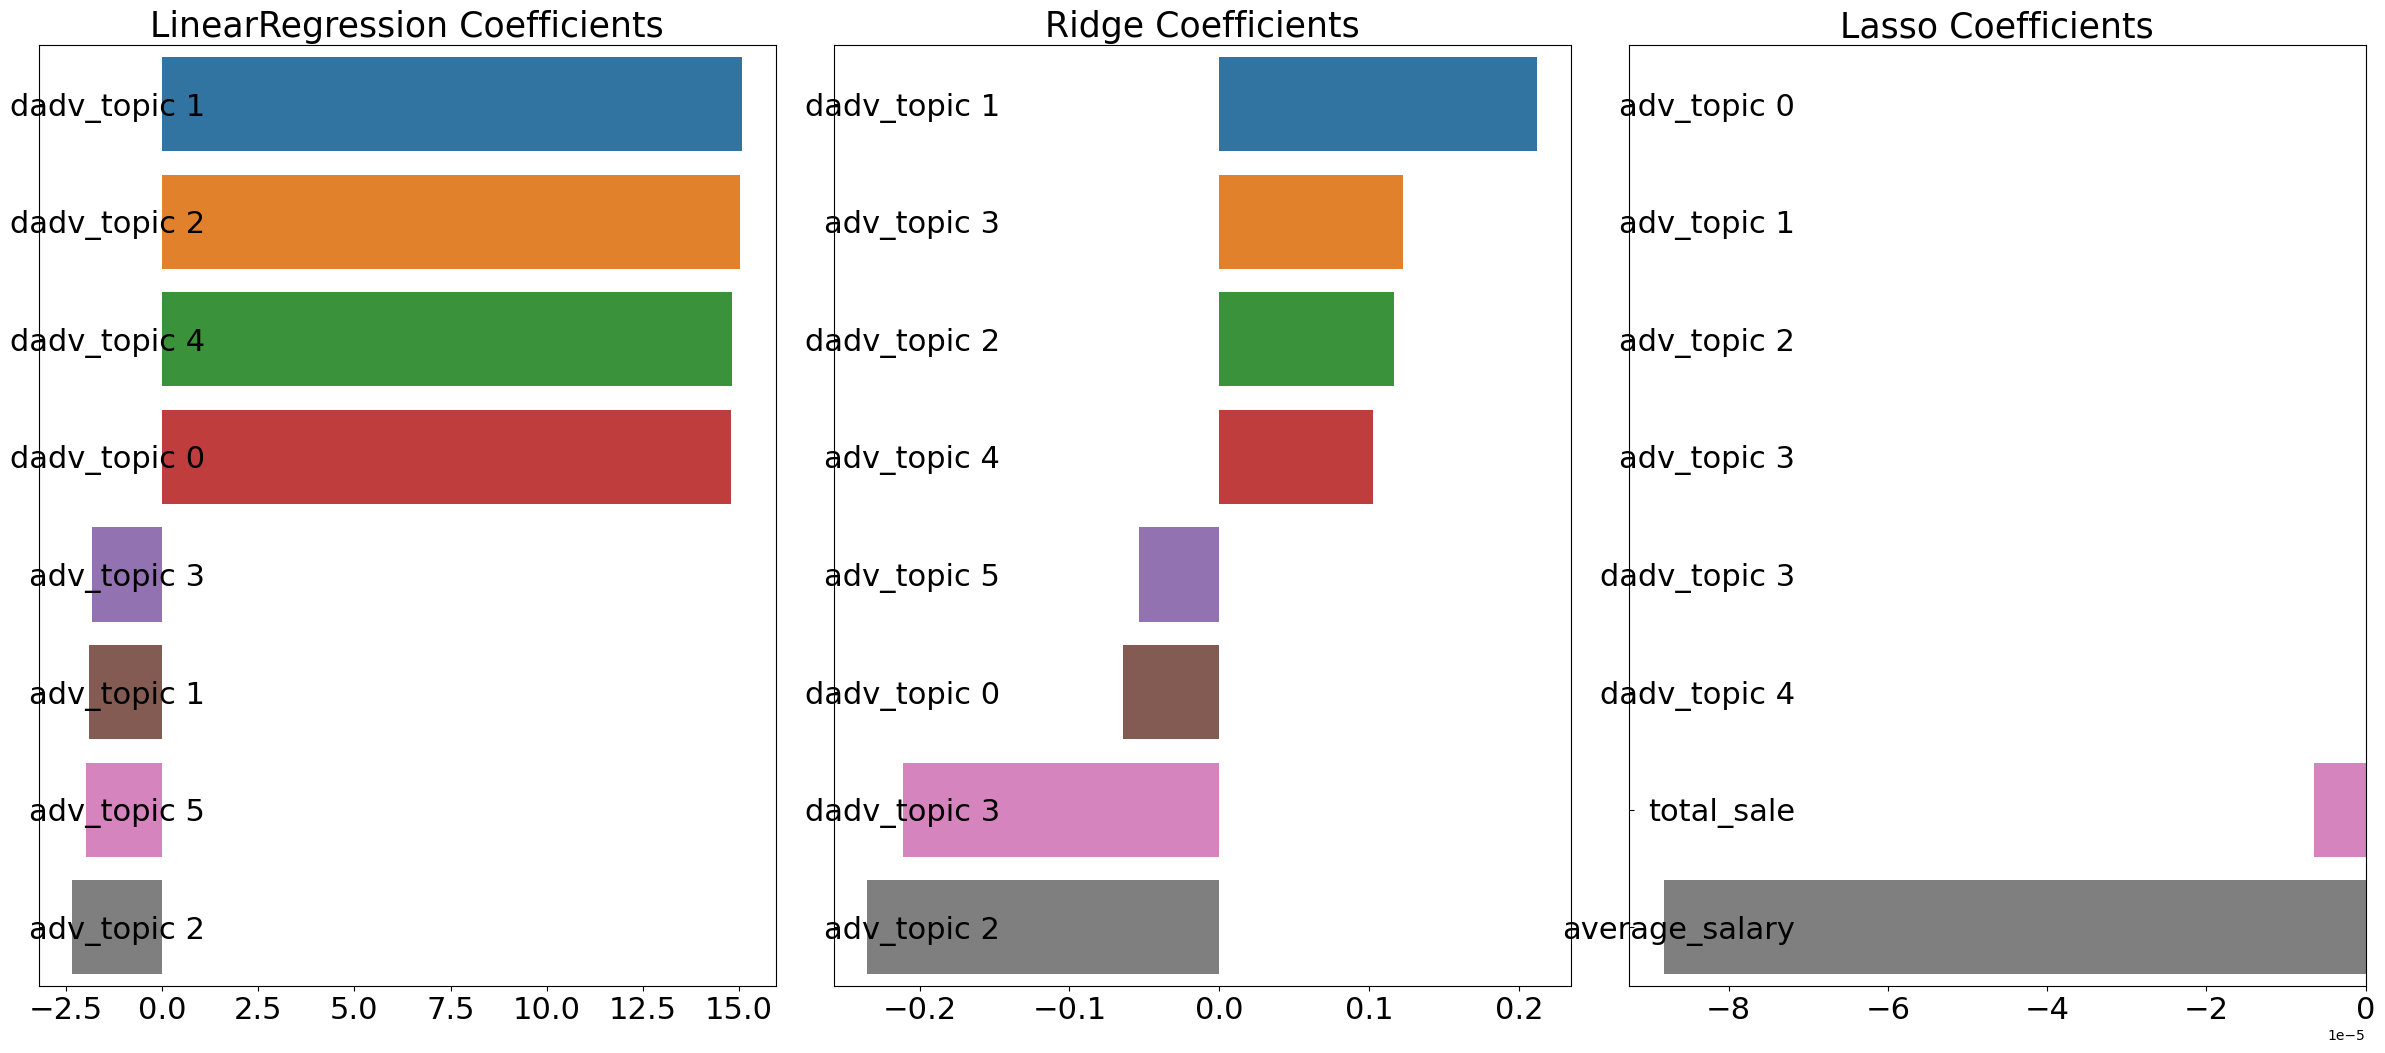

In [145]:
def visualize_coefficient(models):
    fig, axs = plt.subplots(figsize = (24,10), nrows = 1, ncols= 3)
    fig.tight_layout()

    for i_num, model in enumerate(models):

        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat([coef_high, coef_low])

        axs[i_num].set_title(model.__class__.__name__+' Coefficients', size=25)
        axs[i_num].tick_params(axis="y", direction="in",pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index, ax = axs[i_num])

models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [146]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):

    for model in models:

        rmse_list = np.sqrt(-cross_val_score(model, x_data, y_target,
                                             scoring= 'neg_mean_squared_error', cv = 5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE Value List: {1}'.format(model.__class__.__name__, np.round(rmse_list,3)))
        print('\n{0} CV average RMSE Value List: {1}'.format(model.__class__.__name__, np.round(rmse_avg,3)))

models = [ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


Ridge CV RMSE Value List: [0.392 0.476 0.582 0.564 0.684]

Ridge CV average RMSE Value List: 0.54

Lasso CV RMSE Value List: [0.411 0.412 0.586 0.46  0.68 ]

Lasso CV average RMSE Value List: 0.51


In [147]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params,
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(x_data,y_target)
    rmse = np.sqrt(-1*grid_model.best_score_)
    print('{0} After 5 CV, best average RMSE: {1}, best alpha: {2}'.format(model.__class__.__name__,
                                                                           np.round(rmse,4),grid_model.best_params_))

ridge_params = {'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}
print_best_params(ridge_reg,ridge_params)
print_best_params(lasso_reg,lasso_params)

Ridge After 5 CV, best average RMSE: 0.5225, best alpha: {'alpha': 20}
Lasso After 5 CV, best average RMSE: 0.5206, best alpha: {'alpha': 10}


LinearRegression  RMSE:  0.643
Ridge  RMSE:  0.645
Lasso  RMSE:  0.644


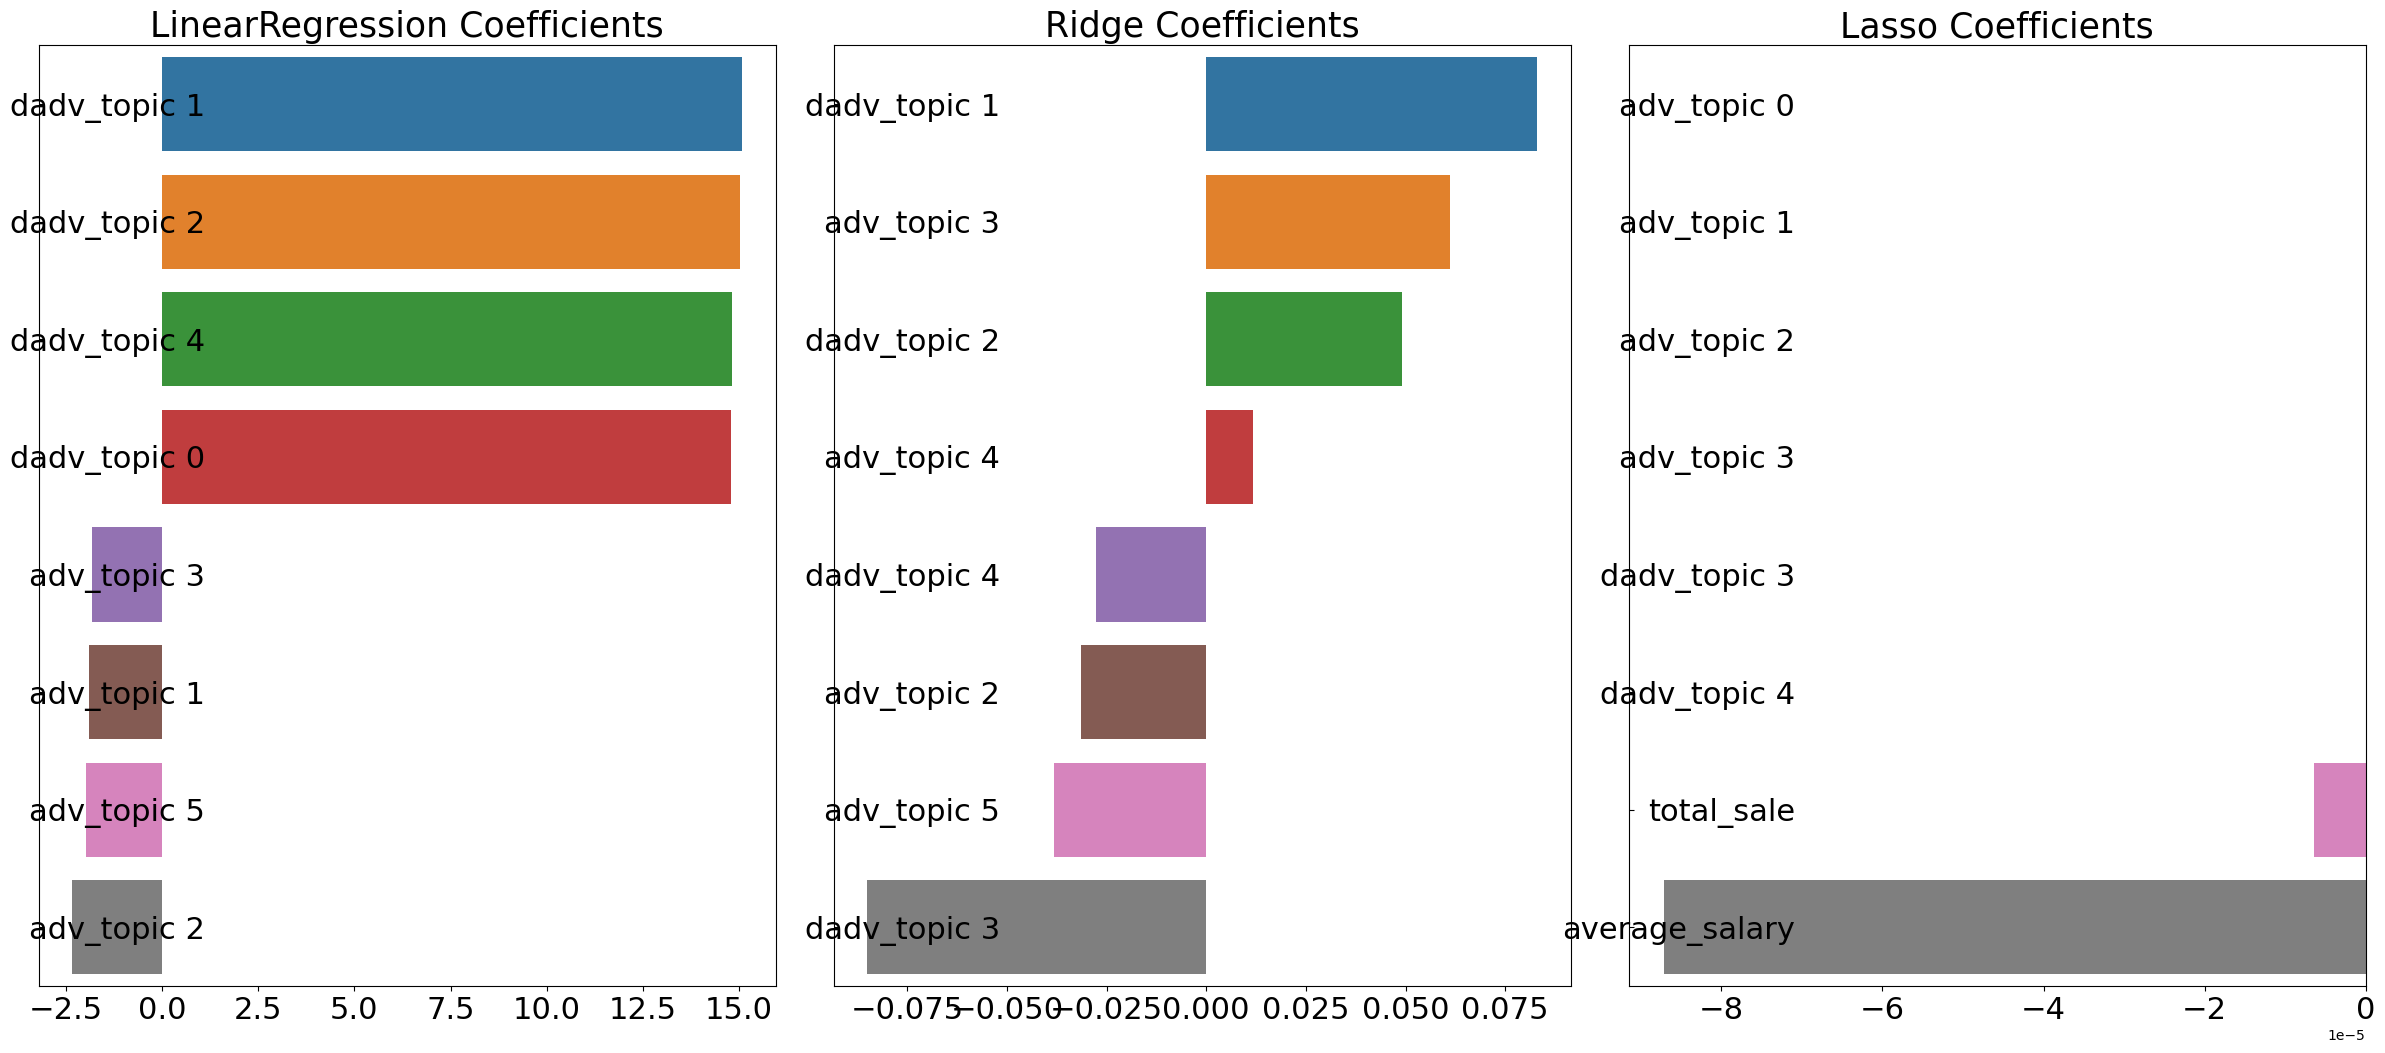

In [148]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge(alpha=20)
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso(alpha=10)
lasso_reg.fit(X_train,y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

visualize_coefficient(models)

In [149]:
from scipy.stats import skew

feature_index = df.dtypes[df.dtypes != 'object'].index

skew_features = df[feature_index].apply(lambda x: skew(x))

skew_feature_top = skew_features[skew_features > 1]
print(skew_feature_top.sort_values(ascending=False))

adv_topic 2     5.275990
total_sale      4.465839
adv_topic 4     3.215666
adv_topic 0     3.127869
adv_topic 1     1.991717
dadv_topic 2    1.938079
dadv_topic 3    1.652160
dadv_topic 1    1.447166
dadv_topic 4    1.417979
dadv_topic 0    1.084985
dtype: float64


In [151]:
for feature in skew_feature_top.index:
    nonzero_indices = df[feature] != 0  # 0이 아닌 값의 인덱스를 찾음
    df.loc[nonzero_indices, feature] = np.log1p(df.loc[nonzero_indices, feature])

,company_name,adv_topic 0,adv_topic 1,adv_topic 2,adv_topic 3,adv_topic 4,adv_topic 5,dadv_topic 0,dadv_topic 1,dadv_topic 2,dadv_topic 3,dadv_topic 4,average_salary,total_sale,turn_over_rate
0,국민건강보험공단,0.000000,0.692840,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.692933,6441,11.230576,-1.609438
1,근로복지공단,0.000000,0.692782,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.692893,5817,9.149231,-2.040221
3,농협은행,0.000000,0.000000,0.000000,0.260527,0.000000,0.738698,0.166652,0.000000,0.000000,0.000000,0.594900,6182,9.480444,-1.897120
4,현대카드,0.000000,0.360291,0.000000,0.565337,0.000000,0.000000,0.000000,0.692727,0.000000,0.000000,0.000000,8737,7.741099,-1.049822
5,중소기업은행,0.000000,0.010223,0.000000,0.000000,0.000000,0.988675,0.000000,0.012493,0.039847,0.000000,0.665900,10065,9.602450,-1.832581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,바로크레디트대부,0.015134,0.654241,0.015132,0.015275,0.015173,0.015258,0.000000,0.000000,0.678378,0.000000,0.000000,4354,7.033506,-1.514128
139,글로벌금융판매,0.000000,0.000000,0.000000,0.000000,0.688247,0.000000,0.000000,0.000000,0.000000,0.691366,0.000000,3442,8.406105,-0.776529
140,현대하이카손해사정,0.679919,0.000000,0.000000,0.000000,0.000000,0.000000,0.276107,0.000000,0.000000,0.000000,0.509526,6082,7.166961,-2.525729
141,아이비케이캐피탈,0.000000,0.000000,0.000000,0.000000,0.000000,0.992217,0.000000,0.000000,0.000000,0.641760,0.089744,9880,8.277463,-2.813411


In [167]:
df_ohe = pd.get_dummies(df)

y_target = df_ohe['turn_over_rate']
x_data = df_ohe.iloc[:,:13]

X_train, X_test, y_train, y_test = train_test_split(x_data, y_target, test_size = 0.2, random_state = 7)

ridge_params = {'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}
print_best_params(ridge_reg,ridge_params)
print_best_params(lasso_reg,lasso_params)

Ridge After 5 CV, best average RMSE: 0.5202, best alpha: {'alpha': 20}
Lasso After 5 CV, best average RMSE: 0.5231, best alpha: {'alpha': 0.03}


LinearRegression  RMSE:  0.664
Ridge  RMSE:  0.638
Lasso  RMSE:  0.638


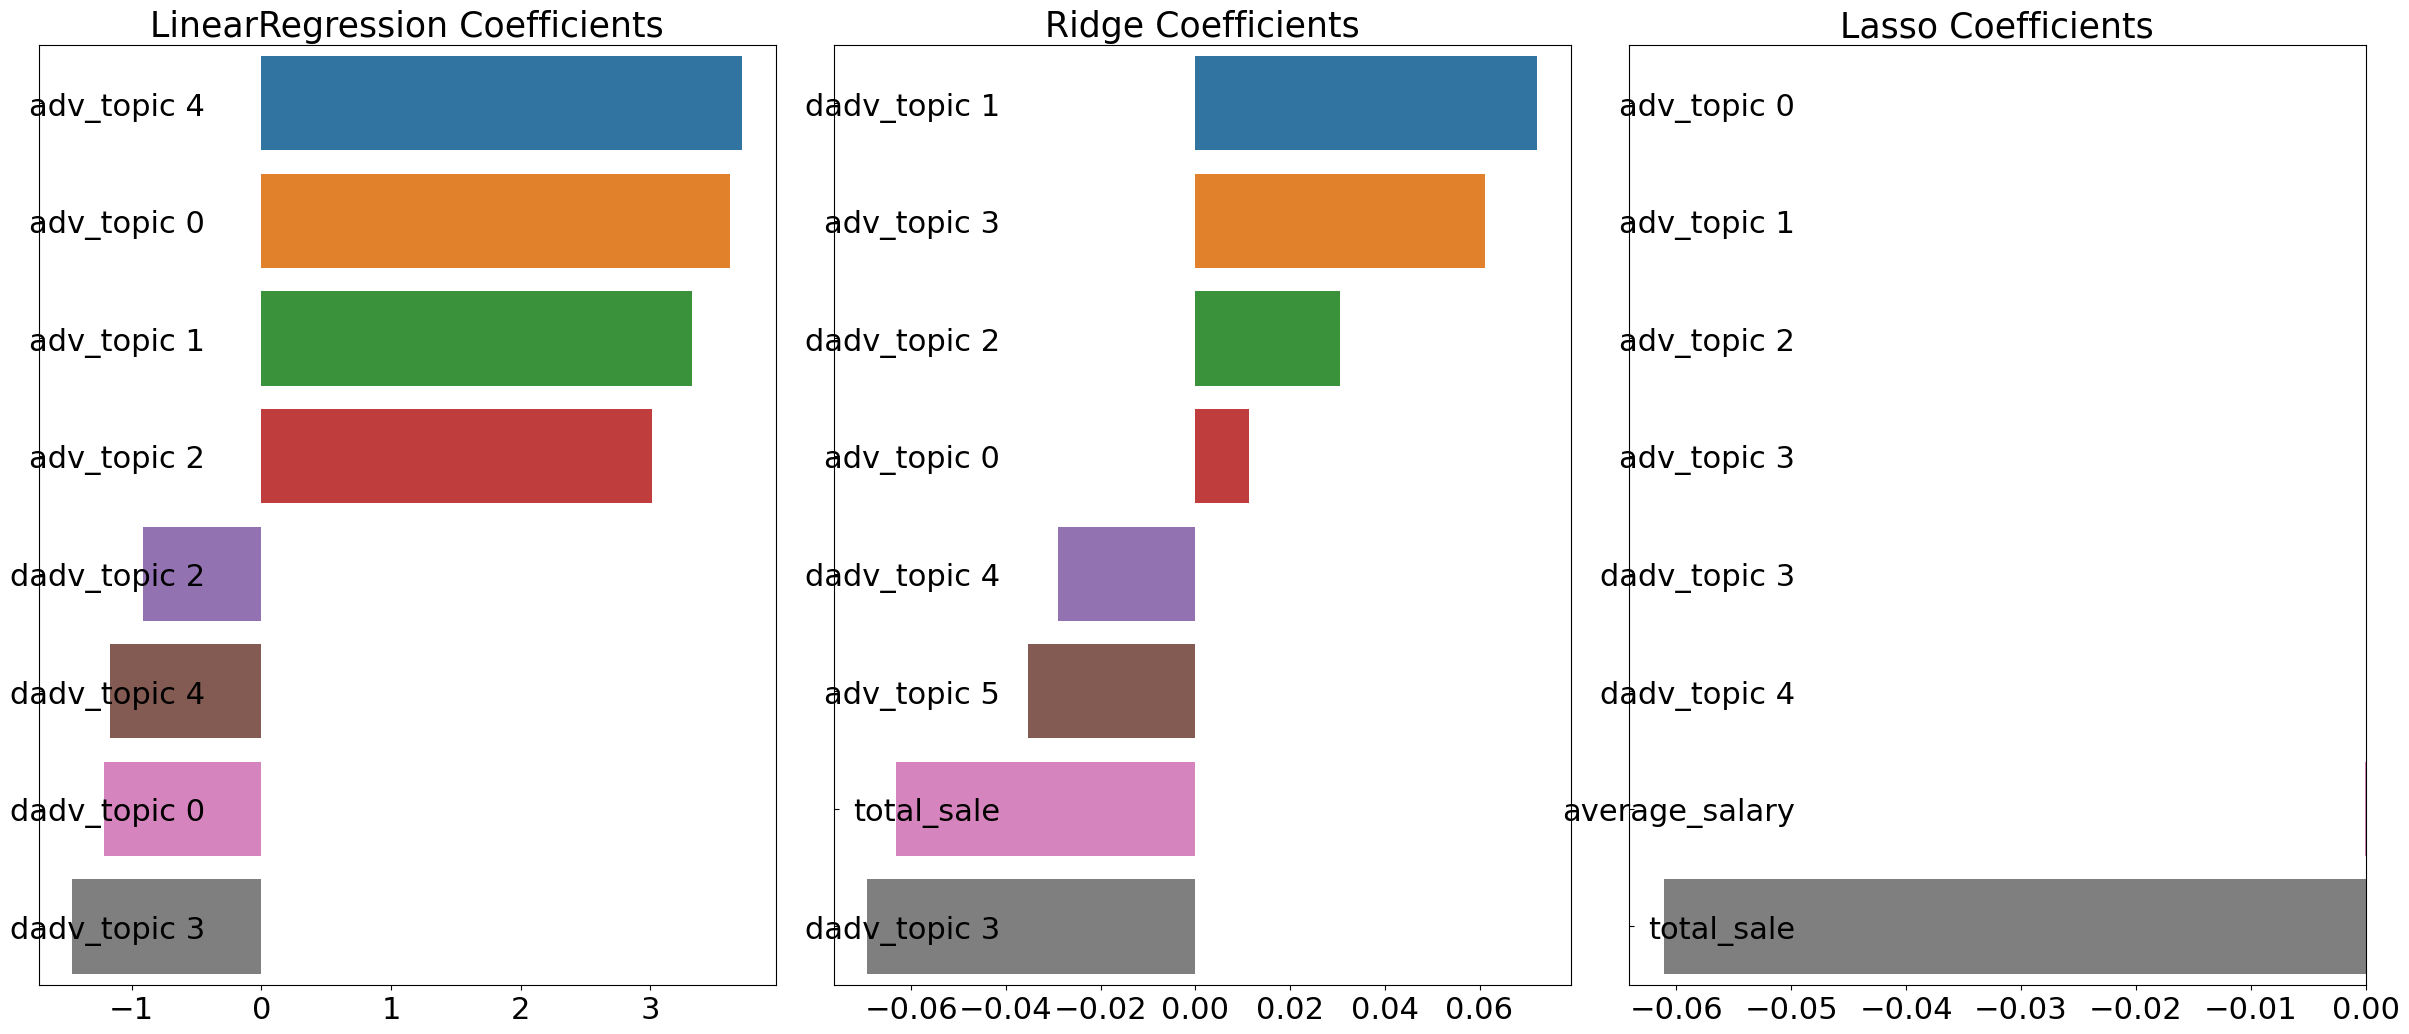

In [168]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge(alpha=20)
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso(alpha=0.03)
lasso_reg.fit(X_train,y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

visualize_coefficient(models)

**Decision Tree**

In [152]:
# Various Types of Regressor Tree with Financial Variable

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor 
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state= 7, max_depth=4)
rf_reg = RandomForestRegressor(random_state= 7, n_estimators= 1000)
gb_reg = GradientBoostingRegressor(random_state= 7, n_estimators= 1000)
xgb_reg = XGBRegressor(n_estimators = 1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
    get_model_cv_prediction(model,x_data, y_target.astype('float64'))

NameError: name 'get_model_cv_prediction' is not defined

<Axes: >

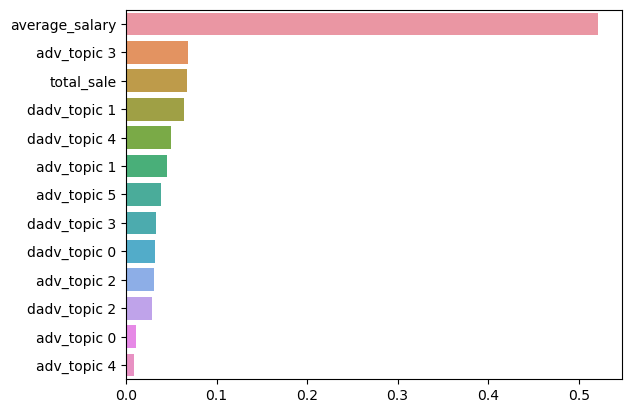

In [ ]:
# Feature graph

rf_reg = RandomForestRegressor(n_estimators=1000)

rf_reg.fit(x_data, y_target)

feature_series = pd.Series(data = rf_reg.feature_importances_, index =x_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y= feature_series.index)


In [ ]:
# Various Types of Regressor Tree without financial value

import matplotlib.pyplot as plt
import seaborn as sns

x_data = df.drop(['company_name','turn_over_rate','total_sale','average_salary'], axis = 1, inplace = False)

dt_reg = DecisionTreeRegressor(random_state= 7, max_depth=4)
rf_reg = RandomForestRegressor(random_state= 7, n_estimators= 1000)
gb_reg = GradientBoostingRegressor(random_state= 7, n_estimators= 1000)
xgb_reg = XGBRegressor(n_estimators = 1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
    get_model_cv_prediction(model,x_data, y_target.astype('float64'))


####  DecisionTreeRegressor ####
5 cv average RMSE : 0.666
####  RandomForestRegressor ####
5 cv average RMSE : 0.623
####  GradientBoostingRegressor ####
5 cv average RMSE : 0.675
####  XGBRegressor ####
5 cv average RMSE : 0.672
####  LGBMRegressor ####
5 cv average RMSE : 0.669


<Axes: >

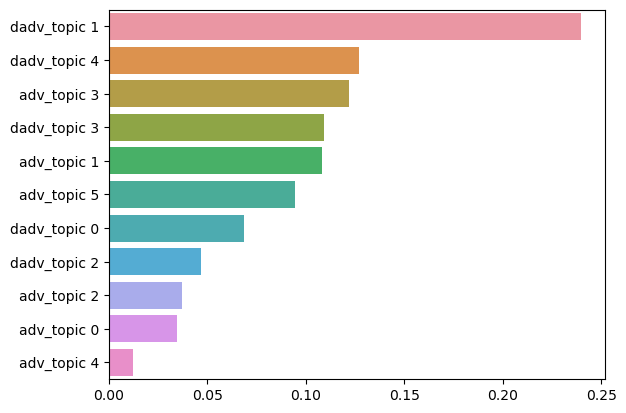

In [ ]:
rf_reg = RandomForestRegressor(n_estimators=1000)

rf_reg.fit(x_data, y_target)

feature_series = pd.Series(data = rf_reg.feature_importances_, index =x_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y= feature_series.index)